# EDA

In [767]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer

In [768]:
plants = pd.read_csv('../data/data_cleaned/plants.csv')

In [769]:
plants.head()

,id,created_utc,title,self_text,comments,score,upvote_ratio,subreddit
0,uw3f46,1.653321e+09,I feel attacked.,no_text,793,63651,0.94,1
1,v4z9xu,1.654380e+09,The liberals are trying to make my plants gay!!,no_text,1281,54217,0.82,1
2,q0hqvn,1.633268e+09,This was supposed to be a plant progress post ...,no_text,572,45198,0.96,1
3,i5rplr,1.596855e+09,My grandpa made me a plant stand 💖,no_text,451,40218,0.96,1
4,lkjvss,1.613414e+09,I let my Golden Pothos get outta hand for just...,no_text,593,39723,0.98,1


### Numerical Feature Correlation

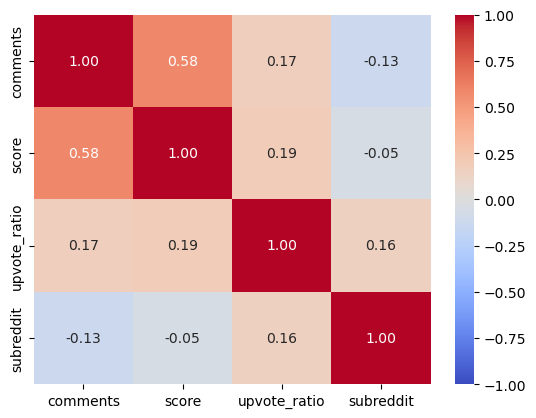

In [770]:
sns.heatmap(plants[['comments', 'score', 'upvote_ratio', 'subreddit']].corr(), cmap='coolwarm', fmt=".2f", vmin=-1, annot=True);

In [771]:
cvec = CountVectorizer(
    max_features=None,
    ngram_range=(1, 2),
    stop_words='english',
)

In [772]:
title_cvec = cvec.fit_transform(plants['title'])

In [773]:
title_cvec_df = pd.DataFrame(title_cvec.todense(), columns=cvec.get_feature_names_out())

In [776]:
title_cvec_df.head()

,00,00 did,00 thrift,000,000 bloomed,000 ladybugs,000 wish,00pm,10,10 10,...,zz baby,zz continue,zz growing,zz growth,zz plant,zz plants,zz prop,zz raven,zz stem,zz won
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [777]:
word_counts = title_cvec_df.sum().sort_values(ascending=False)

In [778]:
top_words = word_counts.head(25)

In [779]:
top_words

plant       1087
garden       568
plants       547
year         431
just         424
help         337
new          307
got          275
tree         267
like         255
growing      231
years        227
little       226
today        226
ve           218
time         215
monstera     214
know         186
finally      180
leaves       179
harvest      173
grow         172
love         165
leaf         161
home         156
dtype: int64

In [823]:
# for wordcloud :)
top_words.to_csv('../scratch/top_words.csv', index=True)

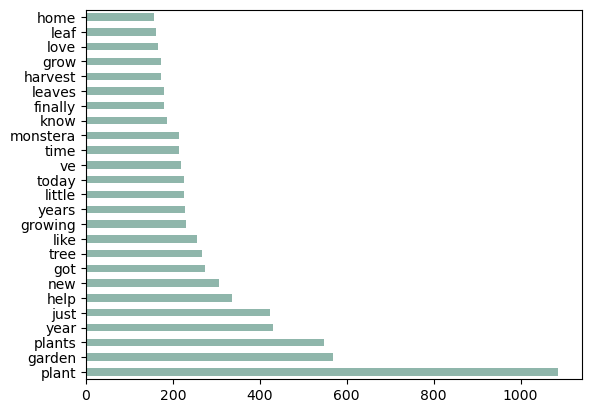

In [800]:
title_cvec_df.sum().sort_values(ascending=False).head(25).plot(kind='barh', color='#8fb6ab');

In [781]:
houseplants_posts = title_cvec_df[plants['subreddit'] == 1]

In [782]:
houseplants_posts.shape

(4736, 33702)

In [783]:
gardening_posts = title_cvec_df[plants['subreddit'] == 0]

In [784]:
gardening_posts.shape

(4535, 33702)

In [807]:
top_houseplants_words = houseplants_posts.sum().sort_values(ascending=False).head(15)

In [808]:
top_gardening_words = gardening_posts.sum().sort_values(ascending=False).head(15)

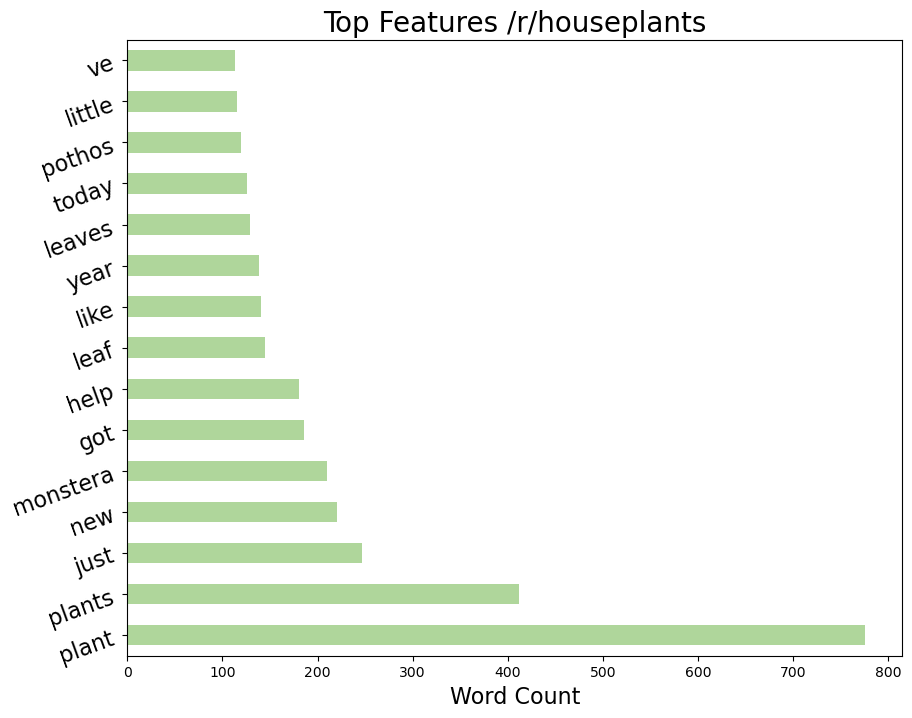

In [814]:
plt.figure(figsize=(10, 8))
top_houseplants_words.plot(kind='barh', color='#afd69b')
plt.xlabel('Word Count', fontsize=16)
plt.yticks(rotation=20, fontsize=16)
plt.title('Top Features /r/houseplants', fontsize=20)
plt.savefig('../images/top_features_houseplants.png', dpi=300); 

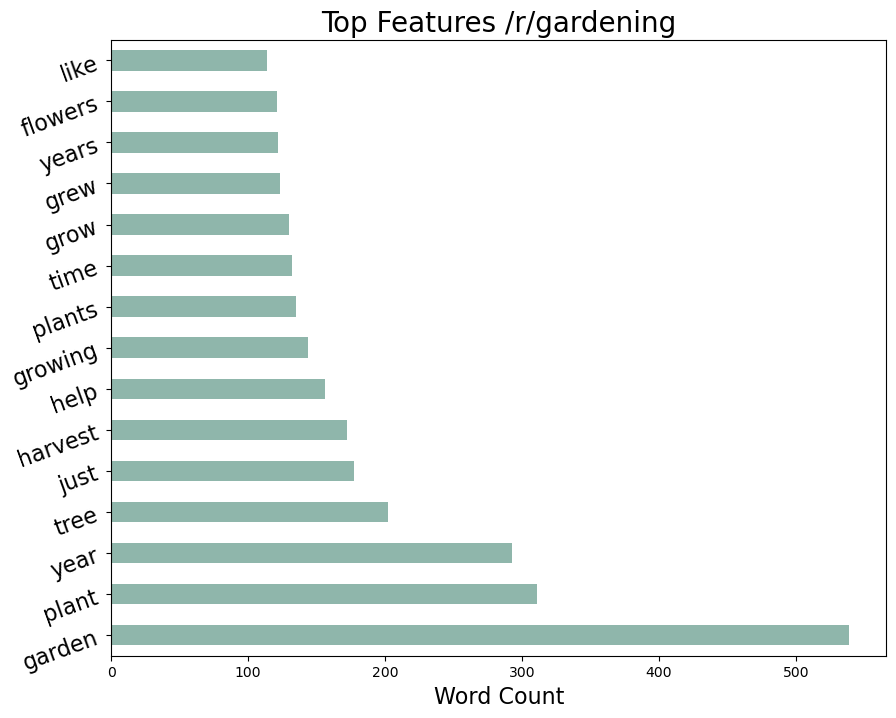

In [817]:
plt.figure(figsize=(10, 8))
top_gardening_words.plot(kind='barh', color='#8fb6ab')
plt.xlabel('Word Count', fontsize=16)
plt.yticks(rotation=20, fontsize=16)
plt.title('Top Features /r/gardening', fontsize=20)
plt.savefig('../images/top_features_gardening.png', dpi=300);